In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor
import warnings
warnings.filterwarnings('ignore')

In [49]:
df2 = pd.read_csv("outcome.csv")

In [50]:
df2.columns = df2.columns.str.replace('\n', '')
df2['SALE PRICE'] = df2['SALE PRICE'].replace('#VALUE!', pd.np.nan)
df2.dropna(subset=['SALE PRICE'], inplace=True)
df2['SALE PRICE'] = pd.to_numeric(df2['SALE PRICE'])
del df2['Unnamed: 0']

In [52]:
df2['ZIP CODE'] = df2['ZIP CODE'].astype('object')
df2['TAX CLASS AT TIME OF SALE'] = df2['TAX CLASS AT TIME OF SALE'].astype('object')
df2['SALE DATE'] = pd.to_datetime(df2['SALE DATE'])
df2['BOROUGH'] = df2['BOROUGH'].astype('category')
df2['NEIGHBORHOOD'] = df2['NEIGHBORHOOD'].astype('category')
df2['BUILDING CLASS CATEGORY'] = df2['BUILDING CLASS CATEGORY'].astype('category')
df2['TAX CLASS AS OF FINAL ROLL 18/19'] = df2['TAX CLASS AS OF FINAL ROLL 18/19'].astype('category')
df2['BUILDING CLASS AS OF FINAL ROLL 18/19'] = df2['BUILDING CLASS AS OF FINAL ROLL 18/19'].astype('category')
df2['TAX CLASS AT TIME OF SALE'] = df2['TAX CLASS AT TIME OF SALE'].astype('category')
df2['BUILDING CLASS AT TIME OF SALE'] = df2['BUILDING CLASS AT TIME OF SALE'].astype('category')
df2['ZIP CODE'] = df2['ZIP CODE'].astype('category')

In [53]:
df2.dtypes

BOROUGH                                        category
NEIGHBORHOOD                                   category
BUILDING CLASS CATEGORY                        category
TAX CLASS AS OF FINAL ROLL 18/19               category
BUILDING CLASS AS OF FINAL ROLL 18/19          category
ZIP CODE                                       category
RESIDENTIAL UNITS                                 int64
COMMERCIAL UNITS                                  int64
TOTAL UNITS                                       int64
LAND SQUARE FEET                                  int64
GROSS SQUARE FEET                                 int64
YEAR BUILT                                        int64
TAX CLASS AT TIME OF SALE                      category
BUILDING CLASS AT TIME OF SALE                 category
SALE PRICE                                      float64
SALE DATE                                datetime64[ns]
log_Sale_Price                                  float64
ft_price                                        

In [54]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
RESIDENTIAL UNITS,178981.0,3.695079e+00,3.099956e+01,0.000000,1.000000,2.000000,2.000000e+00,8.764000e+03
COMMERCIAL UNITS,178981.0,3.475006e-01,8.515670e+00,0.000000,0.000000,0.000000,0.000000e+00,2.261000e+03
TOTAL UNITS,178981.0,4.042580e+00,3.222733e+01,0.000000,1.000000,2.000000,2.000000e+00,8.812000e+03
LAND SQUARE FEET,178981.0,6.442240e+03,1.284397e+05,35.000000,2000.000000,2500.000000,4.000000e+03,1.985040e+07
GROSS SQUARE FEET,178981.0,5.721127e+03,4.779734e+04,30.000000,1428.000000,2000.000000,2.846000e+03,8.942176e+06
YEAR BUILT,178981.0,1.941670e+03,3.074728e+01,1800.000000,1920.000000,1931.000000,1.960000e+03,2.022000e+03
SALE PRICE,178981.0,1.423910e+06,3.531414e+06,10000.000000,617000.000000,844000.000000,1.228844e+06,9.976923e+07
log_Sale_Price,178981.0,1.373635e+01,7.384168e-01,9.210340,13.332624,13.645908,1.402158e+01,1.841837e+01
ft_price,178981.0,5.196019e+02,1.073799e+03,0.067098,316.860465,436.403509,5.909091e+02,3.250000e+05
log_ft_price,178981.0,6.026215e+00,7.316087e-01,-2.701605,5.758462,6.078567,6.381662e+00,1.269158e+01


In [55]:
df2.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,log_Sale_Price,ft_price,log_ft_price
RESIDENTIAL UNITS,1.00,0.01,0.96,0.04,0.66,0.08,0.07,0.08,-0.03,-0.31
COMMERCIAL UNITS,0.01,1.00,0.27,0.41,0.29,-0.00,0.07,0.06,-0.01,-0.12
TOTAL UNITS,0.96,0.27,1.00,0.15,0.72,0.08,0.08,0.09,-0.03,-0.33
LAND SQUARE FEET,0.04,0.41,0.15,1.00,0.55,0.02,0.03,0.02,-0.01,-0.18
GROSS SQUARE FEET,0.66,0.29,0.72,0.55,1.00,0.08,0.13,0.11,-0.03,-0.38
YEAR BUILT,0.08,-0.00,0.08,0.02,0.08,1.00,-0.04,-0.13,-0.05,-0.17
SALE PRICE,0.07,0.07,0.08,0.03,0.13,-0.04,1.00,0.63,0.21,0.20
log_Sale_Price,0.08,0.06,0.09,0.02,0.11,-0.13,0.63,1.00,0.23,0.47
ft_price,-0.03,-0.01,-0.03,-0.01,-0.03,-0.05,0.21,0.23,1.00,0.33
log_ft_price,-0.31,-0.12,-0.33,-0.18,-0.38,-0.17,0.20,0.47,0.33,1.00


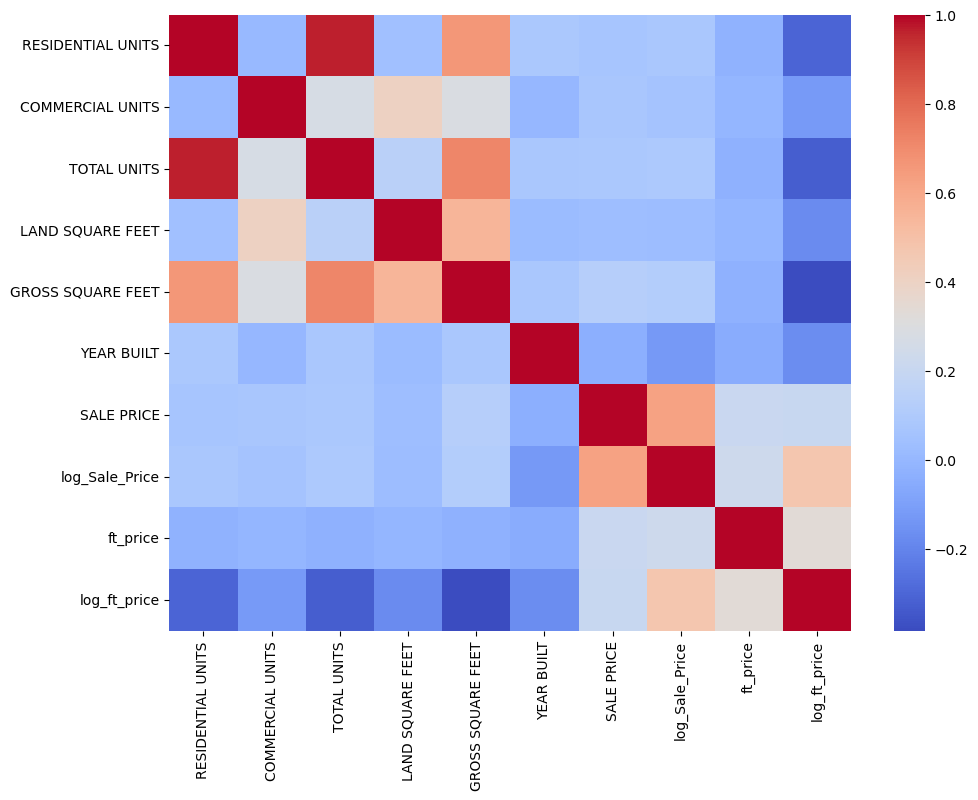

In [56]:
corr = df2.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="coolwarm",annot=False)
plt.show()

# REGRESSION

In [57]:
Y_name = 'log_Sale_Price'

In [58]:
df2.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL 18/19',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'log_Sale_Price', 'ft_price',
       'log_ft_price'],
      dtype='object')

In [59]:
y = df2[Y_name]
X = df2.drop(['SALE PRICE','log_Sale_Price','ft_price','log_ft_price'], axis=1)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

SEED = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=SEED)

In [61]:
TRAIN = pd.concat([X_train, y_train], axis=1)
TEST = pd.concat([X_test, y_test], axis=1)

In [62]:
label = 'log_Sale_Price'
TRAIN[label].describe()

count    125286.000000
mean         13.735310
std           0.737918
min           9.210340
25%          13.331598
50%          13.643832
75%          14.021584
max          18.414160
Name: log_Sale_Price, dtype: float64

In [63]:
%%time
predictor = TabularPredictor(label=label, problem_type='regression').fit(TRAIN, num_gpus=1)

No path specified. Models will be saved in: "AutogluonModels\ag-20230429_072542\"
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230429_072542\"
AutoGluon Version:  0.7.0
Python Version:     3.10.6
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
Train Data Rows:    125286
Train Data Columns: 15
Label Column: log_Sale_Price
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6345.36 MB
	Train Data (Original)  Memory Usage: 8.56 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generator

[1000]	valid_set's rmse: 0.43697
[2000]	valid_set's rmse: 0.434007
[3000]	valid_set's rmse: 0.433819


	-0.4334	 = Validation score   (-root_mean_squared_error)
	22.04s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: LightGBM ...
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead


[1000]	valid_set's rmse: 0.430871
[2000]	valid_set's rmse: 0.430903


	-0.4299	 = Validation score   (-root_mean_squared_error)
	14.95s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: RandomForestMSE ...
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	-0.4508	 = Validation score   (-root_mean_squared_error)
	124.42s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ...
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	-0.4414	 = Validation score   (-root_mean_squared_error)
	2155.23s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	-0.4411	 = Validation score   (-root_mean_squared_error)
	51.14s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
		Could not infer dtype of numpy.int16
Detailed Traceback:
Traceback (most recent call last):
  File "

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


	-0.454	 = Validation score   (-root_mean_squared_error)
	69.39s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetTorch ...
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
		Could not infer dtype of numpy.float32
Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\ljs11\Anaconda3\envs\geo_env\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1502, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\ljs11\Anaconda3\envs\geo_env\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1447, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\ljs11\Anaconda3\envs\geo_env\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "C:\Users\ljs1

CPU times: total: 2h 10min 32s
Wall time: 40min 51s


In [64]:
%%time
y_pred = predictor.predict(TEST.drop(columns=[label]))
y_pred.head()

CPU times: total: 1min 20s
Wall time: 19.7 s


91855     14.024183
65597     14.127354
83000     13.385508
65136     13.777380
169329    13.461721
Name: log_Sale_Price, dtype: float32

In [65]:
predictor.evaluate(TEST, silent=True)

{'root_mean_squared_error': -0.45571719754327356,
 'mean_squared_error': -0.20767816413669501,
 'mean_absolute_error': -0.2637885185329391,
 'r2': 0.6203100161215191,
 'pearsonr': 0.7877470845673017,
 'median_absolute_error': -0.15631172881591837}

In [66]:
%%time
predictor.leaderboard(TEST, silent=True)

CPU times: total: 1min 43s
Wall time: 26.7 s


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.455717,-0.424750,22.910384,0.791910,2374.997372,0.018836,0.000963,0.399186,2,True,10
1,LightGBMLarge,-0.460487,-0.427773,1.307807,0.071438,6.823803,1.307807,0.071438,6.823803,1,True,9
2,LightGBM,-0.461730,-0.429881,3.682997,0.113003,14.949000,3.682997,0.113003,14.949000,1,True,4
3,LightGBMXT,-0.463105,-0.433429,9.619493,0.242002,22.037994,9.619493,0.242002,22.037994,1,True,3
4,CatBoost,-0.464597,-0.441409,2.567165,0.117052,2155.229042,2.567165,0.117052,2155.229042,1,True,6
5,ExtraTreesMSE,-0.466649,-0.441147,2.600268,0.129000,51.141851,2.600268,0.129000,51.141851,1,True,7
6,RandomForestMSE,-0.473434,-0.450840,3.113818,0.118452,124.416496,3.113818,0.118452,124.416496,1,True,5
7,XGBoost,-0.478903,-0.454029,2.454320,0.103000,69.387141,2.454320,0.103000,69.387141,1,True,8
8,KNeighborsUnif,-0.640339,-0.623411,0.618921,0.017993,0.082950,0.618921,0.017993,0.082950,1,True,1
9,KNeighborsDist,-0.644802,-0.634314,0.618996,0.020023,0.082002,0.618996,0.020023,0.082002,1,True,2


In [72]:
%%time
# Define a function that compares all final models
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        rmse = sqrt(round(mean_squared_error(test_labels, predictions), 4))
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, rmse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error','Root Mean Squared Error', 'R^2', 'Accuracy']
    return scores

CPU times: total: 0 ns
Wall time: 0 ns


In [74]:
%%time
auto_scores =  final_comparison([predictor], X_test, y_test)
auto_scores.columns  = ['AutoGluon']

CPU times: total: 1min 2s
Wall time: 16.8 s


In [75]:
auto_scores

,AutoGluon
Mean Absolute Error,0.263800
Mean Squared Error,0.207700
Root Mean Squared Error,0.455741
R^2,0.620300
Accuracy,98.053400


# 可解释分析

### 输出可解释性feature importance

In [67]:
%%time
predictor.feature_importance(TEST)

Computing feature importance via permutation shuffling for 15 features using 5000 rows with 5 shuffle sets...
	341.18s	= Expected runtime (68.24s per shuffle set)
	183.91s	= Actual runtime (Completed 5 of 5 shuffle sets)


CPU times: total: 11min 25s
Wall time: 3min 3s


,importance,stddev,p_value,n,p99_high,p99_low
ZIP CODE,0.180312,0.005560,1.083763e-07,5,0.191761,1.688634e-01
GROSS SQUARE FEET,0.065618,0.006747,1.322660e-05,5,0.079511,5.172594e-02
NEIGHBORHOOD,0.033673,0.003144,9.013201e-06,5,0.040146,2.719936e-02
SALE DATE,0.025767,0.005433,2.237119e-04,5,0.036954,1.458109e-02
BUILDING CLASS AS OF FINAL ROLL 18/19,0.018775,0.003001,7.573568e-05,5,0.024954,1.259554e-02
LAND SQUARE FEET,0.018051,0.003588,1.778923e-04,5,0.025439,1.066258e-02
YEAR BUILT,0.008611,0.001658,1.570813e-04,5,0.012025,5.197097e-03
BOROUGH,0.007551,0.000619,5.376524e-06,5,0.008826,6.276099e-03
BUILDING CLASS AT TIME OF SALE,0.006519,0.001368,2.195215e-04,5,0.009335,3.702530e-03
RESIDENTIAL UNITS,0.003475,0.000860,4.164037e-04,5,0.005247,1.703521e-03


### 输出SHAP

In [68]:
import shap

In [69]:
feature_names = X_train.columns

In [70]:
class AutogluonWrapper:
    def __init__(self, predictor, feature_names):
        self.ag_model = predictor
        self.feature_names = feature_names
    
    def predict(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.feature_names)
        return self.ag_model.predict(X)

In [71]:
X_train_summary = shap.kmeans(X_train, 10)
print("Baseline feature-values: \n", X_train_summary)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'STATEN ISLAND'

In [40]:
ag_wrapper = AutogluonWrapper(predictor, feature_names)
print_accuracy(ag_wrapper.predict)

explainer = shap.KernelExplainer(ag_wrapper.predict, X_train_summary)

NSHAP_SAMPLES = 10000  # how many samples to use to approximate each Shapely value, larger values will be slower
N_VAL = 300  # how many datapoints from validation data should we interpret predictions for, larger values will be slower

NameError: name 'print_accuracy' is not defined

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[0:N_VAL,:], nsamples=NSHAP_SAMPLES)
shap.summary_plot(shap_values, X_test.iloc[0:N_VAL,:])